In [2]:
import geopandas as gpd
import pandas as dp
import matplotlib.pyplot as plt
import osmnx as ox

In [7]:
path_ups = '/Users/rodrigo/Documents/tfg/data/final/finalups_4326.gpkg'
ups = gpd.read_file(path_ups)

In [8]:
ups.head()

,id,year,country,region,continent,geometry
0,1.0,1992,Afghanistan,SA,Asia,"POLYGON ((66.47073 30.92085, 66.47907 30.92085..."
1,1.0,1993,Afghanistan,SA,Asia,"POLYGON ((66.47073 30.91252, 66.47073 30.90418..."
2,1.0,1994,Afghanistan,SA,Asia,"POLYGON ((66.47073 30.91252, 66.47073 30.90418..."
3,1.0,1995,Afghanistan,SA,Asia,"POLYGON ((66.47073 30.91252, 66.47073 30.90418..."
4,1.0,1996,Afghanistan,SA,Asia,"POLYGON ((66.44573 30.90418, 66.44573 30.89585..."


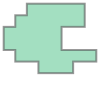

In [9]:
type(ups)
up = ups['geometry'][0]
up

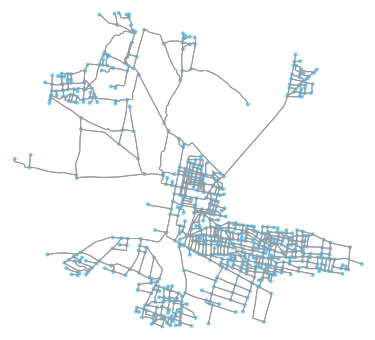

In [10]:
G = ox.graph_from_polygon(up, network_type = 'drive')
ox.plot_graph(G)
plt.show()

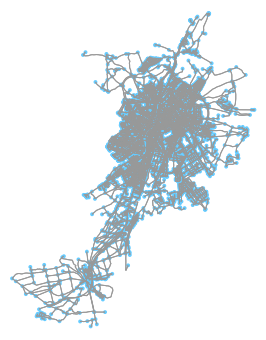

In [51]:
G = ox.graph_from_place('Valladolid, Spain', network_type='walk')
ox.plot_graph(G)
plt.show()

In [48]:
basic_stats = ox.basic_stats(G, area = )
print(basic_stats['circuity_avg'])
basic_stats

{'n': 1211,
 'm': 3515,
 'k_avg': 5.805119735755574,
 'intersection_count': 1121,
 'streets_per_node_avg': 3.319570602807597,
 'streets_per_node_counts': {0: 0, 1: 90, 2: 20, 3: 533, 4: 551, 5: 15, 6: 2},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.07431874483897605,
  2: 0.016515276630883566,
  3: 0.4401321222130471,
  4: 0.4549958711808423,
  5: 0.012386457473162676,
  6: 0.0016515276630883566},
 'edge_length_total': 493912.6950000001,
 'edge_length_avg': 140.51570270270273,
 'street_length_total': 277560.19999999995,
 'street_length_avg': 139.75840886203423,
 'street_segments_count': 1986,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0106179328261777,
 'self_loop_proportion': 0.0008534850640113798,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

## create function for vm

In [1]:
import geopandas as gpd
import pandas as dp
import matplotlib.pyplot as plt
import osmnx as ox
# osmnx reprojects to the respective utm and then change projection again back to what it was! beautiful!

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import math


# read shapefile and keep only one year (2009)
shpfile = gpd.read_file('/Users/rodrigo/Documents/tfg/data/final/finalups_4326.gpkg')
shpfile2009 = shpfile[shpfile['year'] == "2009"]

In [14]:
import csv
with open('/Users/rodrigo/Documents/tfg/data/final/metrics_connectivity.csv','w') as f1:
    writer = csv.writer(f1, delimiter=',',lineterminator='\n',)
    
    for i in range(10):
        row = [1,2,3, "cosas"]
        writer.writerow(row)


In [30]:
if len(shpfile2009) < 1: 
    raise ValueError("Empty GeoDataFrame")

import csv
with open('/Users/rodrigo/Documents/tfg/data/ups/connectivity/metrics_connectivity.csv','w') as f1:
    writer = csv.writer(f1, delimiter=',',lineterminator='\n',)
    npols = shpfile.shape[0]
    for i in range(2):
        pol = shpfile['geometry'][i]

        # reproject to calculate the area
        polutm, _ = project_geometry(pol)
        areapol = polutm.area

        G = ox.graph_from_polygon(pol, network_type = 'drive')

        country = shpfile.iloc[i,:]['country']
        output_path = '/Users/rodrigo/Documents/tfg/data/ups/connectivity/' + country + '/' + country + str(i)+".graphml"

        ox.io.save_graphml(G, output_path)
        basic_stats = ox.basic_stats(G, area = areapol)

        writer.writerow(list(basic_stats.values()))
        writer.writerow(["NA"])
     

Projected GeoDataFrame to UTM-42
Projected GeoDataFrame to UTM-42


In [28]:
[1] + ["hey", 1]

[1, 'hey', 1]

In [24]:
list(basic_stats.values())

[989,
 2648,
 5.354903943377149,
 770,
 2.7168857431749243,
 {0: 0, 1: 219, 2: 0, 3: 613, 4: 156, 5: 1},
 {0: 0.0,
  1: 0.22143579373104147,
  2: 0.0,
  3: 0.6198179979777553,
  4: 0.1577350859453994,
  5: 0.0010111223458038423},
 484421.2439999986,
 182.9385362537759,
 242210.62200000035,
 182.9385362537767,
 1324,
 18.631803284149957,
 14.506055135283587,
 9126.027628787848,
 4563.013814393944,
 1.045339934517771,
 0.0,
 None,
 None]

In [11]:
def project_gdf(gdf, to_crs=None, to_latlong=False):
    """
    Project a GeoDataFrame to UTM.
    Automatically chooses the UTM zone appropriate for its geometries'
    centroid. The simple calculation in this function works well for most
    latitudes, but won't work for some far northern locations like Svalbard
    and parts of far northern Norway.
    Parameters
    ----------
    gdf : geopandas.GeoDataFrame
        the gdf to be projected
    to_crs : dict or string or pyproj.CRS
        if not None, project to this CRS instead of to UTM
    to_latlong : bool
        if True, projects to settings.default_crs instead of to UTM
    Returns
    -------
    gdf_proj : geopandas.GeoDataFrame
        the projected GeoDataFrame
    """
    if len(gdf) < 1:
        raise ValueError("Cannot project an empty GeoDataFrame")

    # if to_crs was passed-in, use this value to project the gdf
    if to_crs is not None:
        gdf_proj = gdf.to_crs(to_crs)

    # if to_crs was not passed-in, calculate the centroid of the geometry to
    # determine UTM zone
    else:
        # else, project the gdf to UTM
    
        # calculate the centroid of the union of all the geometries in the
        # GeoDataFrame
        avg_longitude = gdf["geometry"].unary_union.centroid.x
    
        # calculate the UTM zone from this avg longitude and define the UTM
        # CRS to project
        utm_zone = int(math.floor((avg_longitude + 180) / 6.0) + 1)
        utm_crs = f"+proj=utm +zone={utm_zone} +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
    
        # project the GeoDataFrame to the UTM CRS
        gdf_proj = gdf.to_crs(utm_crs)
        print(f"Projected GeoDataFrame to UTM-{utm_zone}")
    
        return gdf_proj
    
def project_geometry(geometry, crs=None, to_crs=None, to_latlong=False):
    """
    Project a shapely (Multi)Polygon from lat-lng to UTM, or vice-versa.
    Parameters
    ----------
    geometry : shapely.geometry.Polygon or shapely.geometry.MultiPolygon
        the geometry to project
    crs : dict or string or pyproj.CRS
        the starting coordinate reference system of the passed-in geometry,
        default value (None) will set settings.default_crs as the CRS
    to_crs : dict or string or pyproj.CRS
        if not None, just project to this CRS instead of to UTM
    to_latlong : bool
        if True, project from crs to lat-lng, if False, project from crs to
        local UTM zone
    Returns
    -------
    geometry_proj, crs : tuple
        the projected shapely geometry and the crs of the projected geometry
    """
    if crs is None:
        crs = 4326

    gdf = gpd.GeoDataFrame()
    gdf.crs = crs
    gdf["geometry"] = None
    gdf.loc[0, "geometry"] = geometry
    gdf_proj = project_gdf(gdf, to_crs=to_crs, to_latlong=to_latlong)
    geometry_proj = gdf_proj["geometry"].iloc[0]
    return geometry_proj, gdf_proj.crs